https://www.kaggle.com/datasets/ruslankl/mice-protein-expression?select=Data_Cortex_Nuclear.csv


**Acerca del Conjunto de Datos**

**Contexto**

Niveles de expresión de 77 proteínas medidas en la corteza cerebral de 8 clases de ratones de control y con síndrome de Down expuestos a un condicionamiento de miedo contextual, una tarea utilizada para evaluar el aprendizaje asociativo.

**Contenido**

El conjunto de datos consiste en los niveles de expresión de 77 proteínas/modificaciones proteicas que produjeron señales detectables en la fracción nuclear de la corteza. Hay 38 ratones de control y 34 ratones trisómicos (síndrome de Down), para un total de 72 ratones. En los experimentos, se registraron 15 mediciones de cada proteína por muestra/ratón. Por lo tanto, para los ratones de control, hay 38x15, o 570 mediciones, y para los ratones trisómicos, hay 34x15, o 510 mediciones. El conjunto de datos contiene un total de 1080 mediciones por proteína. Cada medición puede considerarse como una muestra/ratón independiente.

Las ocho clases de ratones se describen en función de características como el genotipo, el comportamiento y el tratamiento. Según el genotipo, los ratones pueden ser de control o trisómicos. Según el comportamiento, algunos ratones han sido estimulados para aprender (contexto-choque) y otros no (choque-contexto). Para evaluar el efecto del fármaco memantina en la recuperación de la capacidad de aprendizaje en ratones trisómicos, algunos ratones han sido inyectados con el fármaco y otros no.

Clases:

- c-CS-s: ratones de control, estimulados para aprender, inyectados con solución salina (9 ratones)
- c-CS-m: ratones de control, estimulados para aprender, inyectados con memantina (10 ratones)
- c-SC-s: ratones de control, no estimulados para aprender, inyectados con solución salina (9 ratones)
- c-SC-m: ratones de control, no estimulados para aprender, inyectados con memantina (10 ratones)
- t-CS-s: ratones trisómicos, estimulados para aprender, inyectados con solución salina (7 ratones)
- t-CS-m: ratones trisómicos, estimulados para aprender, inyectados con memantina (9 ratones)
- t-SC-s: ratones trisómicos, no estimulados para aprender, inyectados con solución salina (9 ratones)
- t-SC-m: ratones trisómicos, no estimulados para aprender, inyectados con memantina (9 ratones)

In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [71]:
dataset=pd.read_csv("Data_Cortex_Nuclear.csv")
df=dataset.copy()
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [73]:
# Obtener las columnas que son de tipo objeto
variables_objeto = df.select_dtypes(include=['object']).columns.tolist()

# Mostrar el resultado
print("Variables de tipo objeto:", variables_objeto)

Variables de tipo objeto: ['MouseID', 'Genotype', 'Treatment', 'Behavior', 'class']


In [74]:
df.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


In [75]:
df["Genotype"].value_counts()

Genotype
Control    570
Ts65Dn     510
Name: count, dtype: int64

In [76]:
df["class"].value_counts()

class
c-CS-m    150
c-SC-m    150
c-CS-s    135
c-SC-s    135
t-CS-m    135
t-SC-m    135
t-SC-s    135
t-CS-s    105
Name: count, dtype: int64

In [77]:
df["Treatment"].value_counts()

Treatment
Memantine    570
Saline       510
Name: count, dtype: int64

In [78]:
df["Behavior"].value_counts()

Behavior
S/C    555
C/S    525
Name: count, dtype: int64

In [79]:
# Label Encoding)
df["Genotype"] = df["Genotype"].map({'Control': 0, 'Ts65Dn': 1})
df["Treatment"] = df["Treatment"].map({'Memantine': 0, 'Saline': 1})
df["Behavior"] = df["Behavior"].map({'S/C': 0, 'C/S': 1})

# Aplicar One-Hot Encoding
df = pd.get_dummies(df, columns=['class'])

df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,Treatment,Behavior,class_c-CS-m,class_c-CS-s,class_c-SC-m,class_c-SC-s,class_t-CS-m,class_t-CS-s,class_t-SC-m,class_t-SC-s
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0,1,True,False,False,False,False,False,False,False
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0,1,True,False,False,False,False,False,False,False
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0,1,True,False,False,False,False,False,False,False
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0,1,True,False,False,False,False,False,False,False
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0,1,True,False,False,False,False,False,False,False


## Valores faltantes y duplicados

MouseID         0
DYRK1A_N        3
ITSN1_N         3
BDNF_N          3
NR1_N           3
               ..
class_c-SC-s    0
class_t-CS-m    0
class_t-CS-s    0
class_t-SC-m    0
class_t-SC-s    0
Length: 89, dtype: int64


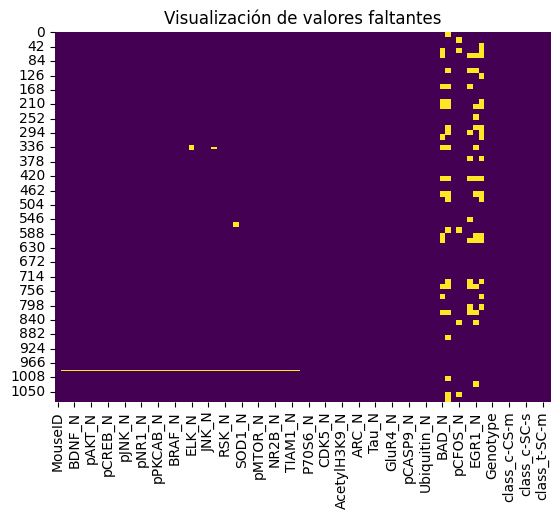

In [80]:
# Verificar valores faltantes
print(df.isnull().sum())

# Visualizar valores faltantes
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Visualización de valores faltantes')
plt.show()

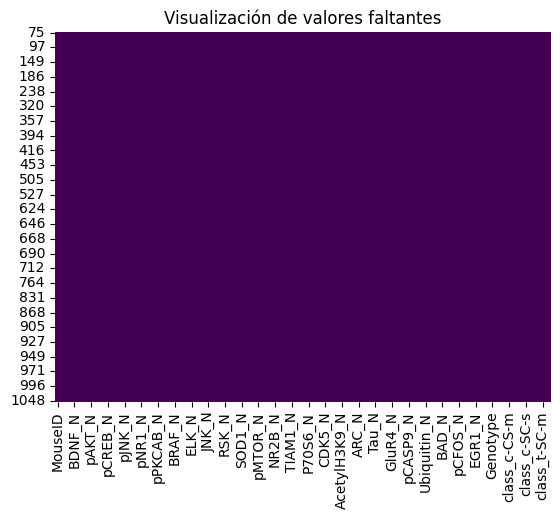

In [81]:
df=df.dropna()

# Visualizar valores faltantes
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Visualización de valores faltantes')
plt.show()

In [82]:
# Eliminar duplicados si existen
df.drop_duplicates(inplace=True)

# Verificar si se eliminaron duplicados
duplicados=df.duplicated().sum()

if duplicados==0:
    print("No existen duplicados en el data frame")
else:
    print("Hay duplicados aún")

No existen duplicados en el data frame


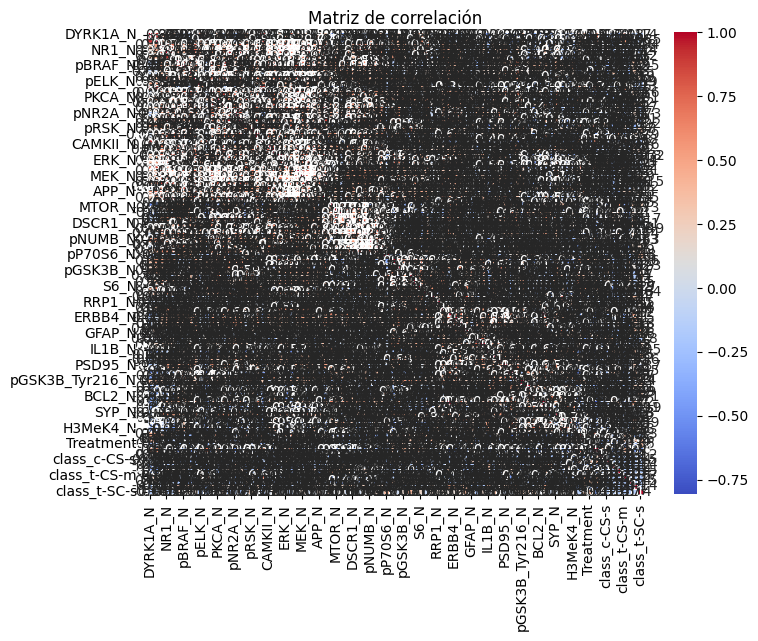

In [83]:
df=df.drop(columns=['MouseID'])
correlationMatrix = df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlationMatrix,annot=True, cmap='coolwarm',linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()



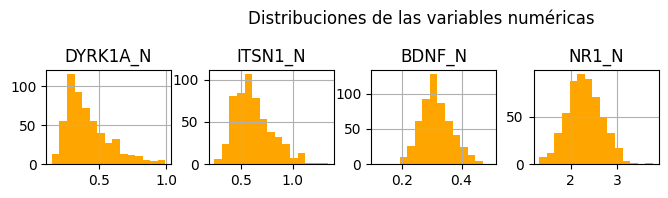

In [84]:
# Histogramas para cada variable numérica
df[["DYRK1A_N","ITSN1_N","BDNF_N","NR1_N"]].hist(bins=15, figsize=(10, 6), layout=(4, 5), color='orange')
plt.suptitle('Distribuciones de las variables numéricas')
plt.show()

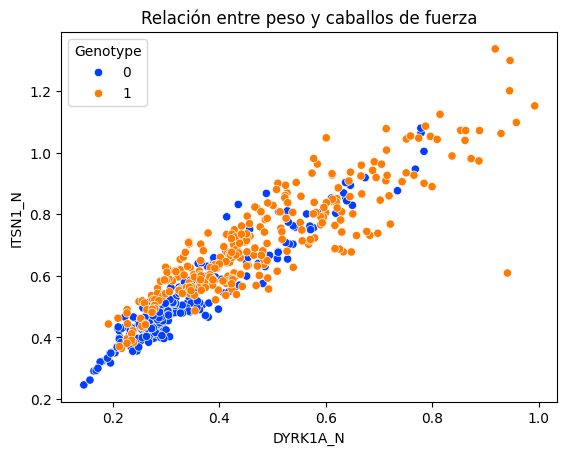

In [85]:
# Scatter plot para ver la relación entre weight y horsepower
sns.scatterplot(x='DYRK1A_N', y='ITSN1_N', hue='Genotype', data=df, palette='bright')
plt.title('Relación entre peso y caballos de fuerza')
plt.show()

In [86]:
# Aplicar seleccion según correlación

correlationTarget=abs(correlationMatrix["Genotype"])
relevantFeatures=correlationTarget[correlationTarget>0.5]
print("Atributos relevantes basados en la correlación con el class_c-CS-m o variable objetivo:")
print(relevantFeatures)

Atributos relevantes basados en la correlación con el class_c-CS-m o variable objetivo:
APP_N       0.551710
Tau_N       0.541209
Genotype    1.000000
Name: Genotype, dtype: float64


In [87]:
# Ganancia de información
from sklearn.feature_selection import mutual_info_classif

# calculo de ganancia de info de cada atributo
X=df.drop(columns=['Genotype'])
y=df['Genotype']
infoGain=mutual_info_classif(X,y)

# Dataframe 
infoGainDF=pd.DataFrame({"Feature":X.columns, "InfoGain":infoGain})
infoGainDF=infoGainDF.sort_values(by="InfoGain",ascending=False)
print('Atributos ordenados por Ganancia de Informacion')
print(infoGainDF)

Atributos ordenados por Ganancia de Informacion
         Feature  InfoGain
56         Tau_N  0.261504
46       pPKCG_N  0.190992
1        ITSN1_N  0.172575
30         APP_N  0.165795
50  AcetylH3K9_N  0.144142
..           ...       ...
27         MEK_N  0.000000
55        nNOS_N  0.000000
78      Behavior  0.000000
75      H3MeK4_N  0.000000
77     Treatment  0.000000

[87 rows x 2 columns]


In [88]:
# Basado en consistencia

from sklearn.feature_selection import SelectKBest, f_classif

# Seleccionar los 6 mejores atributos basados en su consistencia con la clase
selector=SelectKBest(score_func=f_classif,k=6)
selector.fit(X,y)
consistentFeatures=X.columns[selector.get_support()]
print("Atributos por consistencia")
print(consistentFeatures)

Atributos por consistencia
Index(['ITSN1_N', 'APP_N', 'S6_N', 'Tau_N', 'class_c-CS-s', 'class_c-SC-s'], dtype='object')


In [89]:
# Comparacion y seleccion general

selectedFeatures=set(relevantFeatures.index).intersection(consistentFeatures).intersection(infoGainDF["Feature"])
print("Atributos seleccionados en comun por los tres metodos")
print(selectedFeatures)

Atributos seleccionados en comun por los tres metodos
{'APP_N', 'Tau_N'}


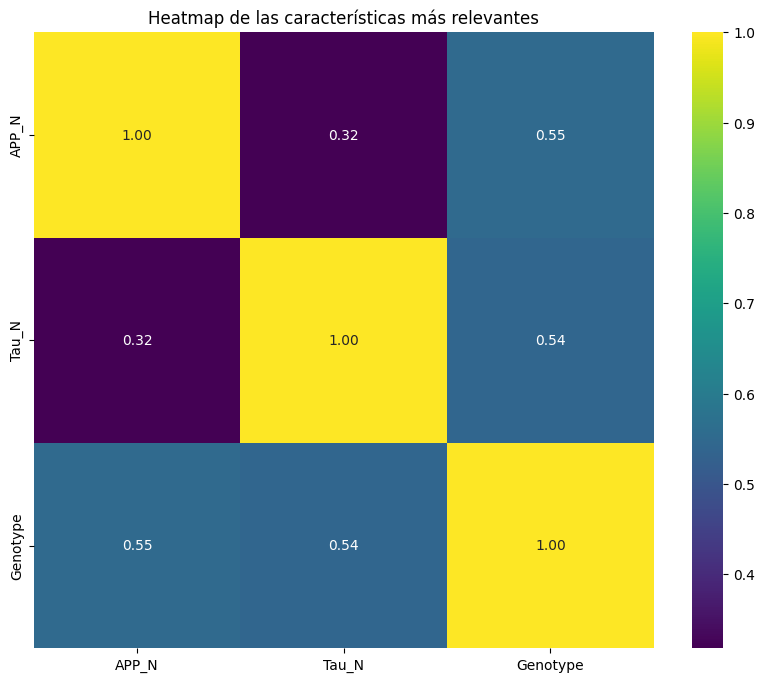

In [90]:
#subconjunto del DataFrame con caracteristicas seleccionadas
selectedDF=df[list(selectedFeatures)+['Genotype']]

#calcular matriz de correlacion para las caracteristicas
correlationMatrixSelected=selectedDF.corr()

# mapa de calor
plt.figure(figsize=(10,8))
sns.heatmap(correlationMatrixSelected,annot=True, cmap='viridis', fmt='.2f')
plt.title("Heatmap de las características más relevantes")
plt.show()

## Visualizaciones


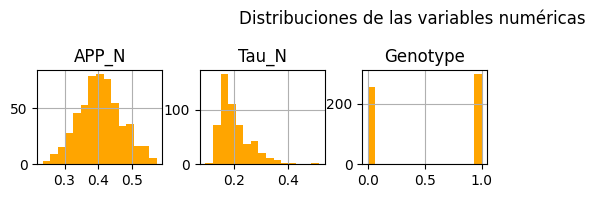

In [91]:
# Histogramas para cada variable numérica
selectedDF.hist(bins=15, figsize=(10, 6), layout=(4, 5), color='orange')
plt.suptitle('Distribuciones de las variables numéricas')
plt.show()

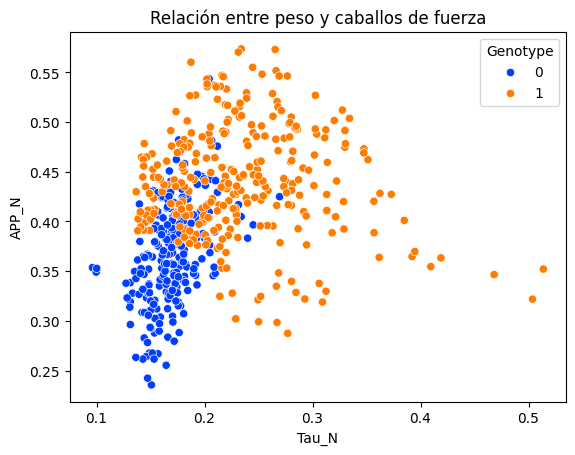

In [92]:
# Scatter plot para ver la relación entre weight y horsepower
sns.scatterplot(x='Tau_N', y='APP_N', hue="Genotype", data=selectedDF, palette='bright')
plt.title('Relación entre peso y caballos de fuerza')
plt.show()

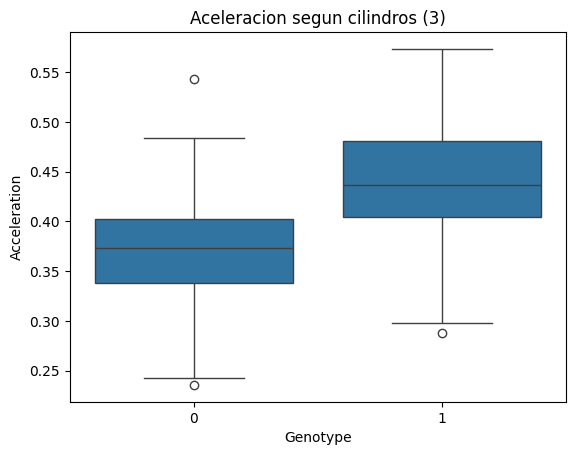

In [93]:
sns.boxplot(x='Genotype', y='APP_N', data=selectedDF)
plt.title('Aceleracion segun cilindros (3)')
plt.ylabel('Acceleration')
plt.show()

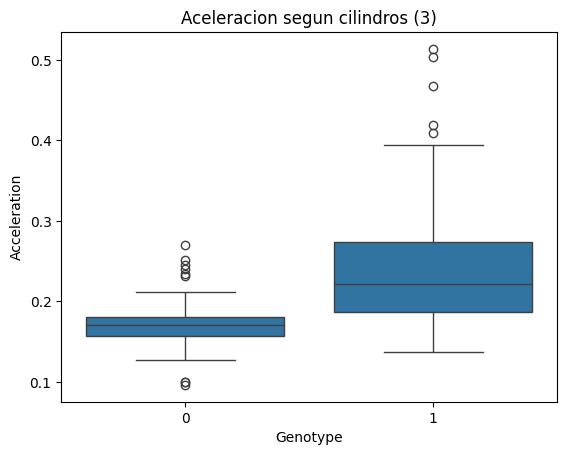

In [94]:
sns.boxplot(x='Genotype', y='Tau_N', data=selectedDF)
plt.title('Aceleracion segun cilindros (3)')
plt.ylabel('Acceleration')
plt.show()